In [55]:
%matplotlib inline

In [49]:
from scipy.optimize import brentq
from scipy.stats import norm

Problem 4.1

In [33]:
data = np.array([-2.,-1.,0.,1.5,2.5])
def add_fun(f, g):
    return lambda x: f(x) + g(x)

def pderlog(data_arr = data):
    
    def derlog(datum):
        return lambda x: 1./(1 + (datum - x)**2) * 2. * (datum - x)
    
    data_mped = [derlog(datum) for datum in data_arr]
    return reduce(add_fun, data_mped)

In [61]:
#a
post_mode = brentq(pderlog(), -2.,2.)
print 'The Posterior Mode is: {0}'.format(post_mode)

The Posterior Mode is: -0.137649277989


In [46]:
#b
def pder2log(x = post_mode, data_arr = data):
    
    def der2log(x, dataum):
        return (-1.)*(2./(1 + (datum - x)**2) + 4.*(datum - x)**2/(1 + (datum - x)**2)**2)
    
    data_mped = np.array([der2log(x, datum) for datum in data_arr])
    
    return data_mped.sum()
                      

In [63]:
two_der_mode = pder2log()
print 'The Second Derivative at the Posterior Mode is: {0}'.format(two_der_mode)

The Second Derivative at the Posterior Mode is: -7.32904180111


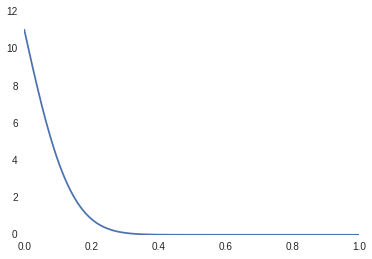

In [104]:
#c
gridnum = 250
post_napprox = norm(loc = post_mode, scale = -1. / two_der_mode)
x = np.linspace(0, 1, gridnum)
post_density = post_napprox.pdf(x)
post_density = post_density * gridnum / post_density.sum() 
plt.plot(x, post_density)